# Making the database

In [96]:
import pandas as pd
import json
import numpy as np
import os

In [97]:
firstround= pd.read_csv("firstround.csv", sep= ';')
secondround=pd.read_csv("secondround.csv", sep=';')

In [98]:
data=pd.concat([firstround, secondround])

In [99]:
data.shape

(159, 150)

In [100]:
print(list(data.columns))

['ind_id', 'geoCountryName', 'geoLocationName', 'summary', 'industryName', 'headline', 'experience', 'education', 'languages', 'publications', 'certifications', 'volunteer', 'honors', 'projects', 'experience1', 'experience2', 'experience3', 'experience4', 'experience5', 'education1', 'education2', 'education3', 'languages_over2', 'honors_stated', 'publications_stated', 'volunteer_stated', 'projects_stated', 'certifications_stated', 'languages_stated', 'exp1_locationName', 'exp1_companyName', 'exp1_description', 'exp1_company', 'exp1_title', 'exp1_honors', 'exp2_companyName', 'exp2_company', 'exp2_title', 'exp2_locationName', 'exp2_description', 'exp2_honors', 'exp3_locationName', 'exp3_companyName', 'exp3_company', 'exp3_title', 'exp3_description', 'exp4_locationName', 'exp4_companyName', 'exp4_description', 'exp4_company', 'exp4_title', 'exp5_locationName', 'exp5_companyName', 'exp5_description', 'exp5_company', 'exp5_title', 'exp5_honors', 'ed1_school', 'ed1_degreeName', 'ed1_schoolN

In [101]:
# Dropping recoded columns 
data = data[['geoCountryName', 'geoLocationName', 'summary', 'industryName', 'headline', 'languages', 'publications', 'certifications', 'volunteer', 'honors', 'projects','exp1_locationName', 'exp1_companyName', 'exp1_description', 'exp1_title', 'exp1_startDate_month', 'exp1_startDate_year', 'exp1_industry', 'exp1_company_empl_low', 'exp1_company_empl_high', 'exp2_locationName', 'exp2_companyName', 'exp2_description', 'exp2_title', 'exp2_startDate_month', 'exp2_startDate_year', 'exp2_endDate_month', 'exp2_endDate_year', 'exp2_industry', 'exp2_company_empl_low', 'exp2_company_empl_high', 'exp3_locationName', 'exp3_companyName', 'exp3_title', 'exp3_description', 'exp3_startDate_month', 'exp3_startDate_year', 'exp3_endDate_month', 'exp3_endDate_year', 'exp3_industry', 'exp3_company_empl_low', 'exp3_company_empl_high', 'exp4_locationName', 'exp4_companyName', 'exp4_description', 'exp4_title', 'exp4_startDate_month', 'exp4_startDate_year', 'exp4_endDate_month', 'exp4_endDate_year', 'exp4_industry', 'exp4_company_empl_low', 'exp4_company_empl_high', 'exp5_locationName', 'exp5_companyName', 'exp5_description', 'exp5_title', 'exp5_startDate_month', 'exp5_startDate_year', 'exp5_endDate_month', 'exp5_endDate_year', 'exp5_industry', 'exp5_company_empl_low', 'exp5_company_empl_high', 'ed1_degreeName', 'ed1_schoolName', 'ed1_fieldOfStudy', 'ed1_activities', 'ed1_description', 'ed1_startDate_year', 'ed2_schoolName', 'ed2_fieldOfStudy', 'ed2_degreeName', 'ed2_activities', 'ed2_description', 'ed2_startDate_year', 'ed3_degreeName', 'ed3_schoolName', 'ed3_fieldOfStudy', 'ed3_description', 'ed3_activities', 'ed3_startDate_year']]

In [102]:
data.reset_index(inplace=True)

In [103]:
data.rename(columns={"index":"ID"}, inplace=True)

In [104]:
data.head(2)

,ID,geoCountryName,geoLocationName,summary,industryName,headline,languages,publications,certifications,volunteer,...,ed2_degreeName,ed2_activities,ed2_description,ed2_startDate_year,ed3_degreeName,ed3_schoolName,ed3_fieldOfStudy,ed3_description,ed3_activities,ed3_startDate_year
0,0,France,Paris Metropolitan Region,Antoine croit à l’intelligence de tous et à la...,IT Services and IT Consulting,"Directeur associé de bluenove, initiateur du m...","[{'name': 'English', 'proficiency': 'FULL_PROF...","[{'date': {'month': 9, 'year': 2017, 'day': 1}...",[],[],...,NaN,NaN,NaN,1996.0,Baccalauréat,Lycée Kernanec,Economics,NaN,NaN,1993.0
1,1,France,Paris Metropolitan Region,French Entrepreneur - Founder and Managing Par...,Venture Capital and Private Equity Principals,Founder & Managing Partner at ROCH Ventures,[],[],[],[],...,NaN,NaN,NaN,2005.0,Baccalauréat,Lycée Janson-de-Sailly,Sciences Economiques et Sociales Option Anglais,NaN,NaN,1998.0


In [105]:
data.shape

(159, 83)

In [106]:
nullvalues=pd.DataFrame(data.isna().sum().sort_values(ascending=False))

In [107]:
nullvalues.head(10)

,0
ed3_activities,145
ed2_activities,142
ed1_activities,129
ed3_description,123
ed2_description,118
ed1_description,111
exp2_endDate_month,81
exp2_endDate_year,80
ed3_fieldOfStudy,78
ed3_degreeName,62


In [108]:
#columns= data.columns()
columnstodrop=[i for i in data.columns if data[i].isna().sum() > len(data)/2+10]
data.drop(columns=columnstodrop, inplace=True)

In [109]:
import re
def clean_industry(x):
    x=str(x)
    pattern = "[a-zA-Z]+ [a-zA-Z]+|[a-zA-Z]+"
    a= re.findall(pattern, x)
    a= ' '.join(a)
    return a

In [110]:
industry_cols= [i for i in data.columns if '_industry' in i]
for col in industry_cols:
    data[col]=data[col].apply(clean_industry)

In [111]:
data.exp1_industry.value_counts()

Computer Software                      19
Information Technology and Services    17
nan                                    16
Civic Social Organization              13
Government Administration              12
Management Consulting                   8
Higher Education                        8
Research                                7
Nonprofit Organization Management       5
International Affairs                   4
Public Relations and Communications     3
Leisure Travel Tourism                  3
Venture Capital Private Equity          3
Banking                                 3
Internet                                3
Think Tanks                             2
Marketing and Advertising               2
Renewables Environment                  2
Online Media                            2
Performing Arts                         2
Insurance                               1
Telecommunications                      1
Restaurants                             1
Fine Art                          

In [91]:
# At some point, fix columns for years stored as floats
year_cols=[i for i in data.columns if 'year' in i]
year_cols

['exp1_startDate_year',
 'exp2_startDate_year',
 'exp2_endDate_year',
 'exp3_startDate_year',
 'exp3_endDate_year',
 'exp4_startDate_year',
 'exp4_endDate_year',
 'exp5_startDate_year',
 'exp5_endDate_year',
 'ed1_startDate_year',
 'ed2_startDate_year',
 'ed3_startDate_year']

In [121]:
data.describe()

,ID,exp1_startDate_month,exp1_startDate_year,exp1_company_empl_low,exp1_company_empl_high,exp2_startDate_month,exp2_startDate_year,exp2_endDate_month,exp2_endDate_year,exp2_company_empl_low,...,exp4_company_empl_high,exp5_startDate_month,exp5_startDate_year,exp5_endDate_month,exp5_endDate_year,exp5_company_empl_low,exp5_company_empl_high,ed1_startDate_year,ed2_startDate_year,ed3_startDate_year
count,159.000000,147.000000,154.000000,142.000000,134.000000,150.000000,153.000000,78.000000,79.000000,142.000000,...,134.000000,128.000000,142.000000,124.000000,137.000000,142.000000,134.000000,146.000000,127.000000,102.000000
mean,45.893082,5.510204,2019.227273,905.647887,1132.626866,6.066667,2018.084967,6.589744,2019.924051,905.647887,...,1132.626866,5.835938,2013.345070,7.024194,2015.182482,905.647887,1132.626866,2008.404110,2008.645669,2006.676471
std,31.890356,3.533339,3.822060,2423.203694,2395.242241,3.575957,3.963564,3.697791,2.894611,2423.203694,...,2395.242241,3.286281,6.152951,3.196705,5.766561,2423.203694,2395.242241,9.574088,8.176163,8.662154
min,0.000000,1.000000,2002.000000,0.000000,1.000000,1.000000,2001.000000,1.000000,2007.000000,0.000000,...,1.000000,1.000000,1975.000000,1.000000,1978.000000,0.000000,1.000000,1968.000000,1983.000000,1982.000000
25%,19.500000,2.000000,2018.000000,2.000000,10.000000,3.000000,2017.000000,4.000000,2018.500000,2.000000,...,10.000000,3.000000,2011.000000,5.000000,2013.000000,2.000000,10.000000,2003.000000,2003.000000,2002.000000
50%,39.000000,5.000000,2020.000000,11.000000,50.000000,6.000000,2019.000000,7.000000,2021.000000,11.000000,...,50.000000,6.000000,2014.500000,7.000000,2016.000000,11.000000,50.000000,2010.000000,2011.000000,2009.000000
75%,71.500000,9.000000,2022.000000,501.000000,500.000000,9.000000,2021.000000,9.000000,2022.000000,501.000000,...,500.000000,9.000000,2017.000000,9.250000,2019.000000,501.000000,500.000000,2015.000000,2015.000000,2013.000000
max,111.000000,12.000000,2023.000000,10001.000000,10000.000000,12.000000,2023.000000,12.000000,2023.000000,10001.000000,...,10000.000000,12.000000,2021.000000,12.000000,2023.000000,10001.000000,10000.000000,2023.000000,2022.000000,2023.000000


In [139]:
data["exp1_company_empl_high"].loc[data["exp1_company_empl_low"]> 10000]
data.exp1_company_empl_low.value_counts(dropna=False)
# the low and high columns are repeated, we are keeping only the low one
# (because the high one is a fake NaN when the low one is over 10 001)

47    NaN
53    NaN
59    NaN
71    NaN
108   NaN
124   NaN
138   NaN
145   NaN
Name: exp1_company_empl_high, dtype: float64

In [143]:
high_cols=[i for i in data.columns if 'high' in i]
data.drop(columns=high_cols, inplace=True)

In [156]:
mask = data.duplicated(subset=['headline'], keep='last')
dropped = data.loc[mask]
dropped

,ID,geoCountryName,geoLocationName,summary,industryName,headline,languages,publications,certifications,volunteer,...,ed1_fieldOfStudy,ed1_startDate_year,ed2_schoolName,ed2_fieldOfStudy,ed2_degreeName,ed2_startDate_year,ed3_degreeName,ed3_schoolName,ed3_fieldOfStudy,ed3_startDate_year
1,1,France,Paris Metropolitan Region,French Entrepreneur - Founder and Managing Par...,Venture Capital and Private Equity Principals,Founder & Managing Partner at ROCH Ventures,[],[],[],[],...,Relations Internationales et Sciences Politiques,2006.0,The Hebrew University,Relations et affaires internationales,NaN,2005.0,Baccalauréat,Lycée Janson-de-Sailly,Sciences Economiques et Sociales Option Anglais,1998.0
2,2,France,Paris Metropolitan Region,Inspired by the power we can build to change t...,Civic and Social Organizations,Co-director Multitudes Foundation - Activist a...,"[{'name': 'Anglais', 'proficiency': 'NATIVE_OR...","[{'date': {'month': 1, 'year': 2021, 'day': 21...",[],"[{'role': 'Co-Founder', 'companyName': 'Collec...",...,Communication orale et rhétorique,2022.0,Investies,Political sciences and government,Training program to prepare women to political...,2020.0,Public narrative,Leading change network - Marshall Ganz,Leadership organisationnel,2020.0
10,10,France,Paris Metropolitan Region,⇒ Rendez-vous sur jerem.io pour télécharger mo...,"Technology, Information and Internet",💡 Senior Product Designer freelance - U​X/U​I ...,"[{'name': 'English', 'proficiency': 'FULL_PROF...",[],[],[],...,Conception de Produits Industriels,NaN,Lycée de Montgeron,Génie Mécanique,BAC STI,NaN,NaN,NaN,NaN,NaN


In [157]:
data.drop_duplicates(subset=['headline'], keep='last', inplace=True)

In [159]:
general_pop_data= pd.DataFrame(data.describe(include="O").T)

In [160]:
general_pop_data.to_csv("general_pop_data.csv", sep=';')

In [163]:
pd.options.display.max_rows = 100
data.head(5).T

,0,3,4,5,6
ID,0,3,4,5,6
geoCountryName,France,France,France,France,France
geoLocationName,Paris Metropolitan Region,Paris Metropolitan Region,Paris Metropolitan Region,Paris Metropolitan Region,Paris Metropolitan Region
summary,Antoine croit à l’intelligence de tous et à la...,"IT Consultant, Technical Expert, Lead develope...",NaN,People Power,16+ years of experience driving change in the ...
industryName,IT Services and IT Consulting,IT Services and IT Consulting,IT Services and IT Consulting,Civic and Social Organizations,IT Services and IT Consulting
headline,"Directeur associé de bluenove, initiateur du m...",Web expert chez Jolicode,Directrice des opérations chez Cap Collectif,"Regional Director (France, Italy, Russia and S...",Co-founder & CEO @Fluicity 💡 Co-founder Associ...
languages,"[{'name': 'English', 'proficiency': 'FULL_PROF...",[{'name': 'Anglais'}],[],"[{'name': 'Anglais', 'proficiency': 'FULL_PROF...","[{'name': 'Arabic', 'proficiency': 'LIMITED_WO..."
publications,"[{'date': {'month': 9, 'year': 2017, 'day': 1}...","[{'date': {'month': 2, 'year': 2015, 'day': 3}...",[],[],"[{'date': {'month': 3, 'year': 2023, 'day': 28..."
certifications,[],[],[],[],[]
volunteer,[],[],"[{'role': 'Administratrice', 'companyName': 'L...","[{'role': 'Volunteer', 'companyName': 'Samu So...","[{'role': 'Board Member', 'companyName': 'BeCo..."


In [164]:
data.shape

(156, 72)

In [165]:
data.to_csv("dataset.csv", sep=';', index=False)

# Vectorizing 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import EnglishStemmer

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.utils.class_weight import compute_sample_weight

pd.set_option("display.max_colwidth", 500)

In [25]:
# only if starting from this step 
df= pd.read_csv("dataset.csv", sep=';')

In [26]:
df.columns

Index(['ID', 'geoCountryName', 'geoLocationName', 'summary', 'industryName',
       'headline', 'languages', 'publications', 'certifications', 'volunteer',
       'honors', 'projects', 'exp1_locationName', 'exp1_companyName',
       'exp1_description', 'exp1_title', 'exp1_startDate_month',
       'exp1_startDate_year', 'exp1_industry', 'exp1_company_empl_low',
       'exp2_locationName', 'exp2_companyName', 'exp2_description',
       'exp2_title', 'exp2_startDate_month', 'exp2_startDate_year',
       'exp2_endDate_month', 'exp2_endDate_year', 'exp2_industry',
       'exp2_company_empl_low', 'exp3_locationName', 'exp3_companyName',
       'exp3_title', 'exp3_description', 'exp3_startDate_month',
       'exp3_startDate_year', 'exp3_endDate_month', 'exp3_endDate_year',
       'exp3_industry', 'exp3_company_empl_low', 'exp4_locationName',
       'exp4_companyName', 'exp4_description', 'exp4_title',
       'exp4_startDate_month', 'exp4_startDate_year', 'exp4_endDate_month',
       'exp4_end

In [27]:
df.exp1_industry.value_counts()

Computer Software                      19
Information Technology and Services    17
Civic Social Organization              13
Government Administration              12
Management Consulting                   8
Higher Education                        8
Research                                7
International Affairs                   4
Nonprofit Organization Management       4
Internet                                3
Leisure Travel Tourism                  3
Public Relations and Communications     3
Banking                                 3
Online Media                            2
Think Tanks                             2
Renewables Environment                  2
Venture Capital Private Equity          2
Performing Arts                         2
Marketing and Advertising               2
Pharmaceuticals                         1
Farming                                 1
Design                                  1
Fine Art                                1
Insurance                         

In [28]:
print(list(df.exp1_companyName.unique()))
print(len(list(df.exp1_companyName.unique())))

['bluenove', 'jolicode', 'cap collectif', 'change.org', 'fluicity', 'adie', 'civocracy', 'VOXE', 'abcdeep', 'sdui', 'leto', 'make.org', 'klarna', 'open source politics', 'sell - syndicat des éditeurs de logiciels de loisirs', 'freelance', 'ad education', 'nestlé france', 'analog sport', 'la cour des contes', 'malt', 'decidim', 'sloop', 'impact hub berlin', 'the one campaign', 'billy', 'institut des politiques publiques', 'egis', 'roch ventures', 'multitudes foundation', "ville d'alfortville", 'afd', 'trikoï conseil', 'google', 'sciences po ofce', 'orchestre national de jazz', 'hippocrate développement', 'sobi - swedish orphan biovitrum ab (publ)', 'capgemini invent', 'impact tank', 'ville de lyon', 'datagora', 'grandvision france', 'cour des comptes', "l'institut paris region", 'umi', 'udaf 71', 'avolta', 'university of paris i: panthéon-sorbonne', 'ville de cachan', 'edf', 'combo (ex-snapshift)', 'cerba healthcare', 'accenta.ai', 'sicoval', 'haute autorité de santé', "journaliste d'im

## Choosing the y

In [29]:
# our "y" here is the exp1_industry 
# it could be the companies but there are a lot of them (128)
# next we are going to drop everything else related to the 1st (last) experience
# ['exp1_locationName', 'exp1_companyName',
#       'exp1_description', 'exp1_title', 'exp1_startDate_month',
#       'exp1_startDate_year', 'exp1_industry', 'exp1_company_empl_low']
# as well as the ID 

In [30]:
df.set_index(['exp1_industry'], drop=True, inplace=True)

In [31]:
df.drop(columns=["ID", 'exp1_locationName', 'exp1_companyName',
       'exp1_description', 'exp1_title', 'exp1_startDate_month',
       'exp1_startDate_year', 'exp1_company_empl_low'], inplace=True)

In [32]:
list_df_columns= list(df.columns)
list_df_columns

['geoCountryName',
 'geoLocationName',
 'summary',
 'industryName',
 'headline',
 'languages',
 'publications',
 'certifications',
 'volunteer',
 'honors',
 'projects',
 'exp2_locationName',
 'exp2_companyName',
 'exp2_description',
 'exp2_title',
 'exp2_startDate_month',
 'exp2_startDate_year',
 'exp2_endDate_month',
 'exp2_endDate_year',
 'exp2_industry',
 'exp2_company_empl_low',
 'exp3_locationName',
 'exp3_companyName',
 'exp3_title',
 'exp3_description',
 'exp3_startDate_month',
 'exp3_startDate_year',
 'exp3_endDate_month',
 'exp3_endDate_year',
 'exp3_industry',
 'exp3_company_empl_low',
 'exp4_locationName',
 'exp4_companyName',
 'exp4_description',
 'exp4_title',
 'exp4_startDate_month',
 'exp4_startDate_year',
 'exp4_endDate_month',
 'exp4_endDate_year',
 'exp4_industry',
 'exp4_company_empl_low',
 'exp5_locationName',
 'exp5_companyName',
 'exp5_description',
 'exp5_title',
 'exp5_startDate_month',
 'exp5_startDate_year',
 'exp5_endDate_month',
 'exp5_endDate_year',
 'exp5_

In [33]:
df=df.applymap(str)

In [34]:
df["text"] = df[list_df_columns].apply(lambda x: " ".join(x), axis =1)
df.reset_index(inplace=True)
mod_df=df[["exp1_industry", "text"]]
mod_df.head(2)

,exp1_industry,text
0,Management Consulting,"France Paris Metropolitan Region Antoine croit à l’intelligence de tous et à la responsabilité de chacun pour réinventer un monde qui reste à hauteur d’homme.\nIl est à ce titre partie prenante de nombreux projets qui tous visent à rallumer les soleils humains, et notamment : \nDirecteur associé de Bluenove, qui assume que les organisations positives les plus impactantes de demain sont celles qui feront levier de l’intelligence collective\nA l’initiative du projet #BrightMirror visant à perm..."
1,NaN,"France Paris Metropolitan Region IT Consultant, Technical Expert, Lead developer, I have an extensive experience in Web development and software architecture. I like solving complex situation, both human and technical.\n\nExpertises: \n- PHP development, CMS (huge experience with Drupal), ""components"" (Symfony2, Silex, Slim), MVC frameworks (particularly Jelix, symfony 1), \n- Software architecture, using the *right* number of moving part to easily scale your infrastructure while enhancing t..."


In [35]:
# mod_df.isna().sum()
# keep this dataframe because it could be useful to test the model later
exp1_industry_nan= mod_df.loc[mod_df["exp1_industry"].isna()]
mod_df= mod_df.loc[mod_df["exp1_industry"].notna()]

In [36]:
# String with special characters 
special_string="sPe@#$ci8<\n7al*& m_ot.h[r f{uc'6r"
print("String before conversion: ",special_string)
# Create a list with normal characters using the isalnum() method
# use the join() function to convert the list to string
normal_string="".join(ch for ch in special_string if ch.isalnum() or ch==' ')
# print the normal string 
print("string after conversion:",normal_string)

String before conversion:  sPe@#$ci8<
7al*& m_ot.h[r f{uc'6r
string after conversion: sPeci87al mothr fuc6r


In [37]:
def clean_text_col(x):
    x=str(x)
    x= "".join(ch for ch in x if ch.isalnum() or ch==' ')
    x= x.lower()
    return x

In [38]:
mod_df.columns

Index(['exp1_industry', 'text'], dtype='object')

In [39]:
mod_df["text"] = mod_df['text'].apply(clean_text_col)

In [40]:
mod_df.head(2)

,exp1_industry,text
0,Management Consulting,france paris metropolitan region antoine croit à lintelligence de tous et à la responsabilité de chacun pour réinventer un monde qui reste à hauteur dhommeil est à ce titre partie prenante de nombreux projets qui tous visent à rallumer les soleils humains et notamment directeur associé de bluenove qui assume que les organisations positives les plus impactantes de demain sont celles qui feront levier de lintelligence collectivea linitiative du projet brightmirror visant à permettre la scénar...
2,Computer Software,france paris metropolitan region nan it services and it consulting directrice des opérations chez cap collectif role administratrice companyname la cravate solidaire timeperiod enddate month 6 year 2021 startdate month 9 year 2016 company minicompany objecturn urnlicompany5186825 entityurn urnlifsminicompany5186825 name la cravate solidaire showcase false active true logo comlinkedincommonvectorimage artifacts width 200 fileidentifyingurlpathsegment 20020001519903535287e1693440000vbetathk...


### Intro to vectorizing and stemming

In [42]:
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

In [43]:
def simple_text_analyzer(text):
    return text.split('/')

In [44]:
stemmer = EnglishStemmer()
stemmer.stem('doing')

'do'

In [45]:
ENGLISH_STOP_WORDS_CUSTOM = ENGLISH_STOP_WORDS - {'do', 'first'}

In [46]:
'do' in ENGLISH_STOP_WORDS_CUSTOM

False

### To personnalize our analyzer

In [47]:
default_analyzer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS_CUSTOM).build_analyzer()

In [48]:
default_analyzer("Hello how are you doing today?")

['hello', 'doing', 'today']

In [49]:
def analyze_with_stemming(text):
    unstemmed_words = default_analyzer(text)
    return (stemmer.stem(word) for word in unstemmed_words)

In [50]:
DO_NOT_STEM_SET = {'morning'}
def analyze_with_stemming2(text):
    unstemmed_words = default_analyzer(text)
    return (word if word in DO_NOT_STEM_SET else stemmer.stem(word)
            for word in unstemmed_words)

In [51]:
list(analyze_with_stemming("Hello how are you doing today?"))

['hello', 'do', 'today']

In [52]:
stemmer_vectorizer = CountVectorizer(analyzer=analyze_with_stemming)

In [53]:
vectors = stemmer_vectorizer.fit_transform(texts).todense()
vocabulary = stemmer_vectorizer.get_feature_names_out()
pd.DataFrame(vectors, columns=vocabulary, index=texts)

,bootcamp,do,good,hello,ml,morn
Hello how are you doing? --- $,0,1,0,1,0,0
doing are )) - you Hello how ? --- $,0,1,0,1,0,0
"Good morning, how do you do? --- $",0,2,1,0,0,1
We are in a ML bootcamp!,1,0,0,0,1,0


## Trying on our dataframe

In [54]:
X= mod_df["text"]
y= mod_df["exp1_industry"]

In [55]:
vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 2))

In [56]:
vectors = vectorizer.fit_transform(X).todense()

In [ ]:
pd.set_option("display.max_rows", 10)

In [57]:
pd.DataFrame(vectors, columns=vocabulary, index=X)

ValueError: Shape of passed values is (140, 85559), indices imply (140, 6)

In [ ]:
vocabulary = vectorizer.get_feature_names_out()

In [ ]:
texts_train, texts_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15,
                                                            random_state=432)

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

## Training the model

In [ ]:
model_rf = RandomForestClassifier()#(class_weight='balanced_subsample')

In [ ]:
# to check if there is a problem (and there often is) 
# note XGBoost works for binary classification only 
# even though the error message says somthing else 

model_rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_train_pred_probas = model_rf.predict_proba(X_train)[:,1]

In [ ]:
roc_auc_score(Y_train, Y_train_pred_probas)

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
# search_cv_rf = GridSearchCV(model_rf,
#                             param_grid={
#                                 'max_depth': [1, 5, 10, 30, 50, 70, 100, 200, 300]
#                             },
#                             cv=3,
#                             scoring='roc_auc')
# search_cv_rf.fit(X_train, Y_train)

In [ ]:
search_cv_rf.best_params_, search_cv_rf.best_score_

({'max_depth': 1}, nan)

In [ ]:
cv_results_rf = pd.DataFrame(search_cv_rf.cv_results_)

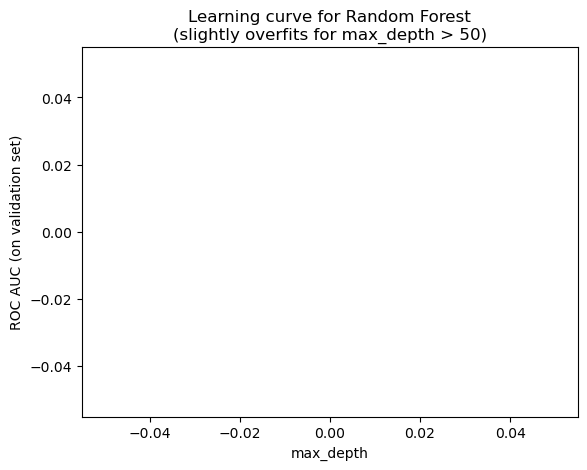

In [ ]:
plt.title("Learning curve for Random Forest\n(slightly overfits for max_depth > 50)")
plt.plot(cv_results_rf['param_max_depth'], cv_results_rf['mean_test_score'])
plt.xlabel("max_depth")
plt.ylabel("ROC AUC (on validation set)");